<h1 align="center"> Лабораторная работа №4 </h1>

---

<h1 align="center"> Университет ИТМО </h1>
<h2 align="center"> Факультет систем управления и робототехники </h2>

---

### Выполнили:
- **Соколов Никита**  
- **Минеев Кирилл**
- **Соловьев Дмитрий**
- **Семёнов Евгений**

---

### Проверил:
- **Догадин Егор Витальевич**

---

### 4 ноября 2024 г.

---

# Подготовка.

### Установка необходимых библиотек:

In [2038]:
!pip install numpy matplotlib sympy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2039]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [2040]:
t = symbols('t', real=True)

In [2041]:
def print_data(eigen_data):
    for i, (eigenvalue, multiplicity, eigenvectors) in enumerate(eigen_data, start=1):
        print(f"Собственный вектор при собственном значении {eigenvalue}")
        for vector in eigenvectors:
            display(vector)

# Задание 1. Непрерывные системы

**Непрерывная линейная динамическая система второго порядка:**
$$
\begin{cases}
    \dot{x}_1(t) = a_1 x_1(t) + a_2 x_2(t), \\
    \dot{x}_2(t) = a_3 x_1(t) + a_4 x_2(t),
\end{cases}
$$
**Или в более компактной форме:**
$$
\dot{x}(t) = A x(t),
\text{где } x(\dot{x}) \in \mathbb{R}^2, \, A \in \mathbb{R}^{2 \times 2}.
$$

### Два неколлинеарных вектора $v_1$ и $v_2$ $\in \mathbb{R}^2$

In [2042]:
v1, v2 = Matrix([1, 2]), Matrix([1, -1])

### 1. Система асимптотически устойчива, при этом если $x(0) = v_1$, то $x(t) ∈ Span\{v_1\}$, а если $x(0) = v_2$, то $x(t) \in Span\{v_2\}$ при всех $t ≥ 0$.

Система является асимптотически устойчивой, если собственные числа матрицы $\( \lambda \)$ меньше нуля $(\( \lambda < 0 \))$. Рассмотрим решение системы в виде
$$
x(t) = e^{At} x(0).
$$
Предположим, что $\( x(t) \in \operatorname{Span}\{ \hat{v}_1 \} \cup \operatorname{Span}\{ \hat{v}_2 \} \)$ для начальных условий $\( x(0) = \hat{v}_1 \)$ или $\( x(0) = \hat{v}_2 \)$ соответственно. Тогда решение этой системы может быть записано как
$$
\alpha x(0) = e^{At} x(0) = e^{At} \alpha E,
$$
где $\( E \)$ — единичная матрица. Отсюда следует, что достаточно задать матрицу $\( A \)$ как матрицу с любыми отрицательными элементами на главной диагонали для обеспечения устойчивости:


In [2043]:
A1 = Matrix([[-2, 0], [0, -2]])
A1

Matrix([
[-2,  0],
[ 0, -2]])

In [2044]:
x = exp(A1 * t) * v1
x

Matrix([
[  exp(-2*t)],
[2*exp(-2*t)]])

In [2045]:
x = exp(A1 * t) * v2
x

Matrix([
[ exp(-2*t)],
[-exp(-2*t)]])

In [2046]:
print_data(A1.eigenvects())

Собственный вектор при собственном значении -2


Matrix([
[1],
[0]])

Matrix([
[0],
[1]])

### 2. Система неустойчива, при этом у матрицы $A$ не существует двух неколлинеарных собственных векторов.

**Система является неустойчивой, если собственные числа матрицы удовлетворяют условию $\(\lambda > 0\)$. Подробное объяснение построения матрицы, у которой не существует двух неколлинеарных собственных векторов, было бы очень объёмным (см. пункт №4). Поэтому ниже приведен пример такой матрицы, для которой будет найдено собственное число, собственный вектор и обобщённый собственный вектор.**


In [2047]:
A2 = Matrix([[1, 0], [1, 1]])
A2

Matrix([
[1, 0],
[1, 1]])

In [2048]:
x = exp(A2 * t) * v2
x

Matrix([
[           exp(t)],
[t*exp(t) - exp(t)]])

In [2049]:
print_data(A2.eigenvects())

Собственный вектор при собственном значении 1


Matrix([
[0],
[1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} 1 \\ 0 \end{bmatrix} \)$**

### 3. Система неустойчива, при этом если $x(0) = v_1$, то $\lim_{t \to \infty} x(t) = 0$

**С ростом $\( t \)$ вектор $\( v_1 \)$ должен сжиматься в $\( \begin{bmatrix} 0 \\ 0 \end{bmatrix} \)$, но так как система неустойчива, возникает необходимость наращивать вектор $\( v \)$ с ростом $\( t \)$. Получается:**

$$
\begin{bmatrix} x_1 & x_2 \\ x_3 & x_4 \end{bmatrix} \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \Rightarrow \begin{cases} x_1 + 2x_2 = 0 \\ x_3 + 2x_4 = 0 \end{cases}
$$

$$
\begin{bmatrix} x_1 & x_2 \\ x_3 & x_4 \end{bmatrix} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix} 2 \\ -2 \end{bmatrix} \Rightarrow \begin{cases} x_1 - x_2 = 2 \\ x_3 - x_4 = -2 \end{cases}
$$

**Скомпонуем системы так, чтобы в одной системе были только $\( x_1 \)$ и $\( x_2 \)$, а в другой $\( x_3 \)$ и $\( x_4 \)$:**

$$
\begin{cases} x_1 + 2x_2 = 0 \\ x_1 - x_2 = 2 \end{cases} \Rightarrow \begin{cases} x_1 = 2 + x_2 \\ 3x_2 = -2 \end{cases} \Rightarrow \begin{cases} x_1 = \frac{4}{3} \\ x_2 = -\frac{2}{3} \end{cases}
$$

$$
\begin{cases} x_3 + 2x_4 = 0 \\ x_3 - x_4 = -2 \end{cases} \Rightarrow \begin{cases} x_3 = x_4 - 2 \\ 4x_4 = 2 \end{cases} \Rightarrow \begin{cases} x_3 = -\frac{4}{3} \\ x_4 = \frac{2}{3} \end{cases}
$$

**Получается итоговая матрица $\( A \)$:**

In [2050]:
A3 = Matrix([[4, -2], [-4, 2]]) / 3
A3

Matrix([
[ 4/3, -2/3],
[-4/3,  2/3]])

In [2051]:
x = exp(A3 * t) * v1
x

Matrix([
[1],
[2]])

In [2052]:
print_data(A3.eigenvects())

Собственный вектор при собственном значении 0


Matrix([
[1/2],
[  1]])

Собственный вектор при собственном значении 2


Matrix([
[-1],
[ 1]])

### 4. Система асимптотически устойчива, при этом матрица $A \in \mathbb{R}^{2 \times 2}$ имеет комплексные собственные вектора вида $v_1 \pm v_2 \cdot i \in \mathbb{C}^2$

**Система асимптотически устойчива, когда собственные числа матрицы $\( \operatorname{Re}(\lambda) < 0 \)$. Итак, имеется базис собственных векторов $\( P = \begin{bmatrix} 1 + 2i & 1 - 2i \\ 1 - i & 1 + i \end{bmatrix} \)$, и необходимо лишь подобрать диагональную матрицу собственных чисел $\( D \)$ (которая также будет комплексной), чтобы получить искомую матрицу $\( A \in \mathbb{R}^2 \)$. Учитывая, что комплексные собственные числа всегда идут сопряжёнными парами, можно выбрать рациональную часть, удовлетворяющую условию асимптотической устойчивости, а мнимую часть подобрать так, чтобы избавиться от дробей:**

$$
A = PDP^{-1} = \begin{bmatrix} 1 + 2i & 1 - 2i \\ 1 - i & 1 + i \end{bmatrix} \begin{bmatrix} -1 - 3i & 0 \\ 0 & -1 + 3i \end{bmatrix} \begin{bmatrix} 1 + 2i & 1 - 2i \\ 1 - i & 1 + i \end{bmatrix}^{-1} = \begin{bmatrix} 0 & 5 \\ -2 & -2 \end{bmatrix}
$$


In [2053]:
A4 = Matrix([[0, 5], [-2, -2]])
A4

Matrix([
[ 0,  5],
[-2, -2]])

In [2054]:
print_data(A4.eigenvects())

Собственный вектор при собственном значении -1 - 3*I


Matrix([
[-1/2 + 3*I/2],
[           1]])

Собственный вектор при собственном значении -1 + 3*I


Matrix([
[-1/2 - 3*I/2],
[           1]])

### 5. Система неустойчива, при этом матрица $A$ имеет такие же собственные вектора, как в предыдущем пункте.

Для того чтобы система стала неустойчивой при тех же собственных векторах, необходимо сделать рациональную часть собственных чисел положительной.

$$
A = PDP^{-1} = \begin{bmatrix} 1 + 2i & 1 - 2i \\ 1 - i & 1 + i \end{bmatrix} \begin{bmatrix} 1 - 3i & 0 \\ 0 & 1 + 3i \end{bmatrix} \begin{bmatrix} 1 + 2i & 1 - 2i \\ 1 - i & 1 + i \end{bmatrix}^{-1} = \begin{bmatrix} 2 & 5 \\ -2 & 0 \end{bmatrix}
$$

In [2055]:
A5 = Matrix([[2, 5], [-2, 0]])
A5

Matrix([
[ 2, 5],
[-2, 0]])

In [2056]:
print_data(A5.eigenvects())

Собственный вектор при собственном значении 1 - 3*I


Matrix([
[-1/2 + 3*I/2],
[           1]])

Собственный вектор при собственном значении 1 + 3*I


Matrix([
[-1/2 - 3*I/2],
[           1]])

### 6. Система не является асимптотически устойчивой, но не является и неустойчивой, при этом матрица $A$ имеет собственные вектора такие же, как в пункте 4.

**Система не будет асимптотически устойчива, если $\( \operatorname{Re}(\lambda) = 0 \)$. В этом случае матрица будет вращать динамическую систему, и траектория останется неизменной.**

$$
\[
A = PDP^{-1} = 
\begin{bmatrix} 
1 + 2i & 1 - 2i \\ 
1 - i & 1 + i 
\end{bmatrix} 
\begin{bmatrix} 
-3i & 0 \\ 
0 & 3i 
\end{bmatrix} 
\begin{bmatrix} 
1 + 2i & 1 - 2i \\ 
1 - i & 1 + i 
\end{bmatrix}^{-1} = 
\begin{bmatrix} 
1 & 5 \\ 
-2 & -1 
\end{bmatrix}
\]
$$

In [2057]:
A6 = Matrix([[1, 5], [-2, -1]])
A6

Matrix([
[ 1,  5],
[-2, -1]])

In [2058]:
print_data(A6.eigenvects())

Собственный вектор при собственном значении -3*I


Matrix([
[-1/2 + 3*I/2],
[           1]])

Собственный вектор при собственном значении 3*I


Matrix([
[-1/2 - 3*I/2],
[           1]])

# Моделирование непрерывного

### Начальные условия

In [2059]:
initial_conditions = [
    Matrix([1, 2]),
    Matrix([0, 2]),
    Matrix([2, 0]),
    Matrix([-1, -1]),
    Matrix([0.5, 0.5])
]

t_vals = np.linspace(0, 10, 1000)

In [2060]:
def plot_dynamic_system(A_matrix, dynamic_system_data):
    vectors = []
    
    for i in range(len(initial_conditions)):
        vectors.append(exp(A_matrix * t) * initial_conditions[i])
    
    for t_value in t_vals:
        for i in range(len(dynamic_system_data)):
            for j in range(len(dynamic_system_data[i])):
                dynamic_system_data[i][j].append(N(vectors[i][j].subs(t, t_value)))
    
    for i in range(len(dynamic_system_data)):
        plt.plot(*[dynamic_system_data[i][j] for j in range(2)])
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(True)
    
    return dynamic_system_data


def plot_movement_in_time(t_values, values, number):
    for value in values:
        plt.plot(t_values, value[number])
    
    plt.xlabel('t')
    plt.ylabel(f'x{number + 1}')
    plt.grid(True)

### 1. Система асимптотически устойчива

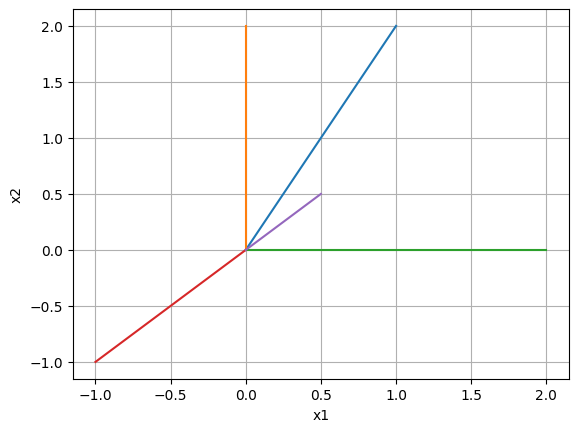

In [2061]:
data = plot_dynamic_system(A1, [[[] for _ in range(2)] for _ in range(len(initial_conditions))])

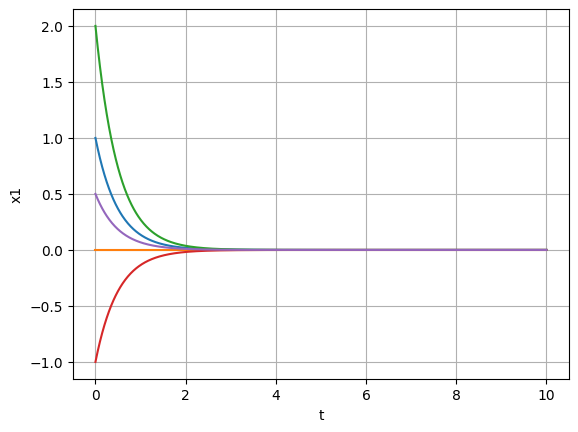

In [2062]:
plot_movement_in_time(t_vals, data, 0)

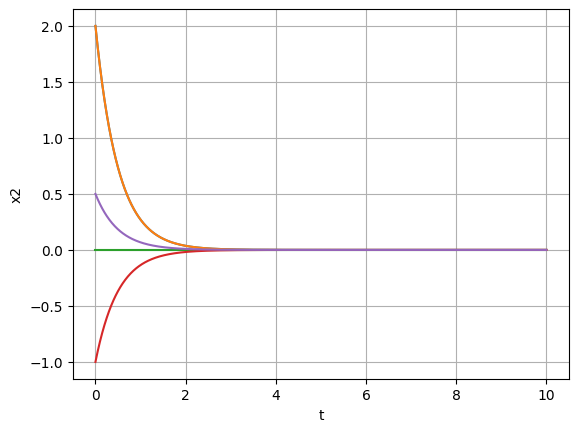

In [2063]:
plot_movement_in_time(t_vals, data, 1)

### 2. Система неустойчива

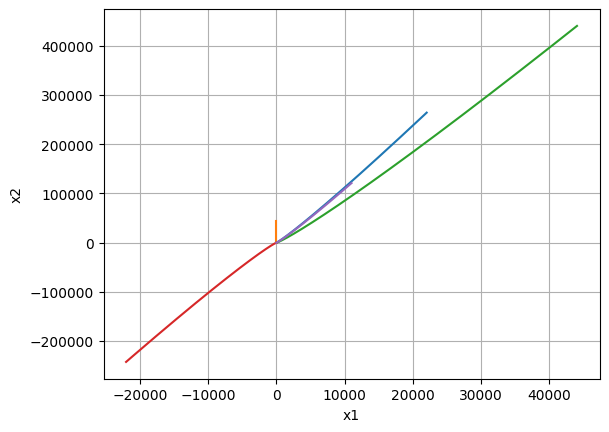

In [2064]:
data = plot_dynamic_system(A2, [[[] for _ in range(2)] for _ in range(len(initial_conditions))])

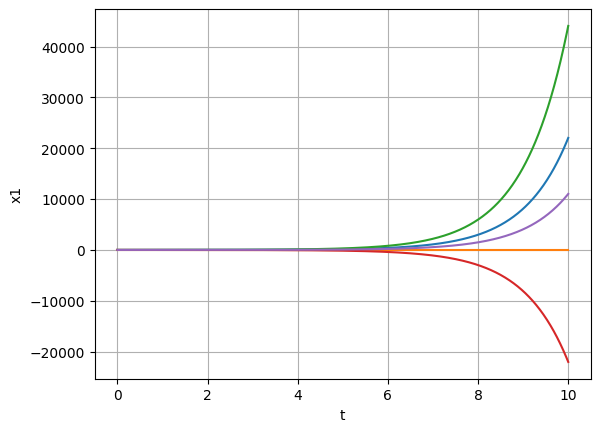

In [2065]:
plot_movement_in_time(t_vals, data, 0)

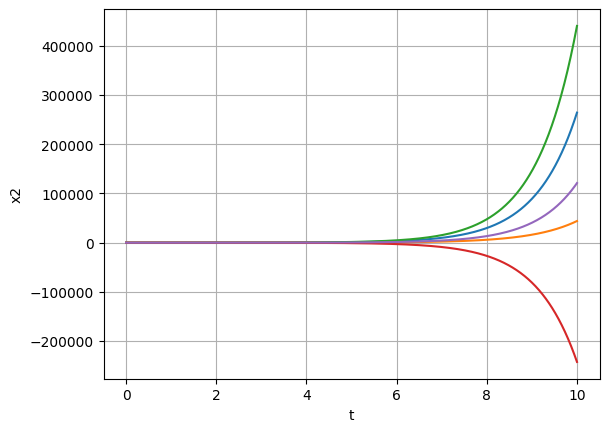

In [2066]:
plot_movement_in_time(t_vals, data, 1)

### 3. Система неустойчива

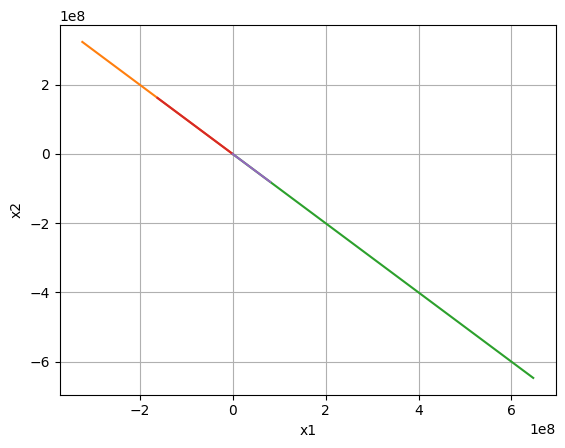

In [2067]:
data = plot_dynamic_system(A3, [[[] for _ in range(2)] for _ in range(len(initial_conditions))])

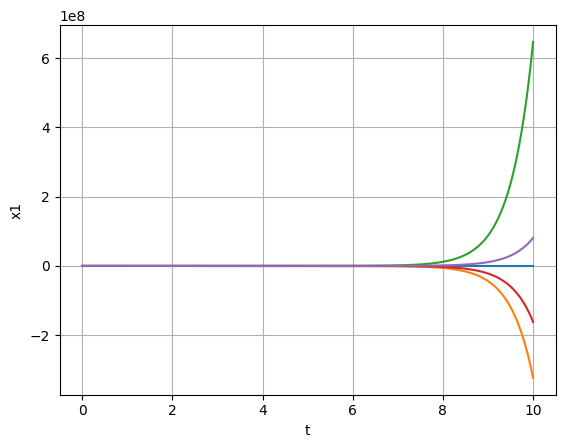

In [2068]:
plot_movement_in_time(t_vals, data, 0)

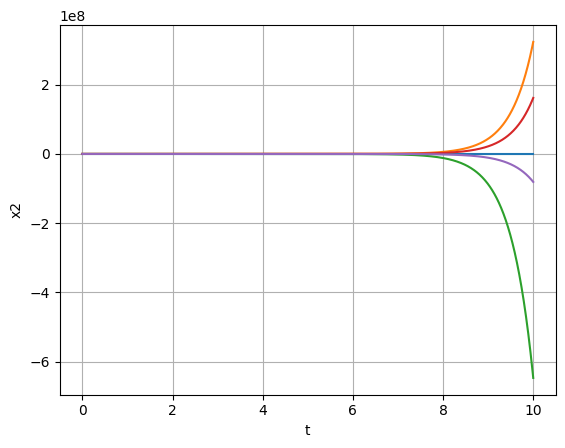

In [2069]:
plot_movement_in_time(t_vals, data, 1)

### 4. Система асимптотически устойчива

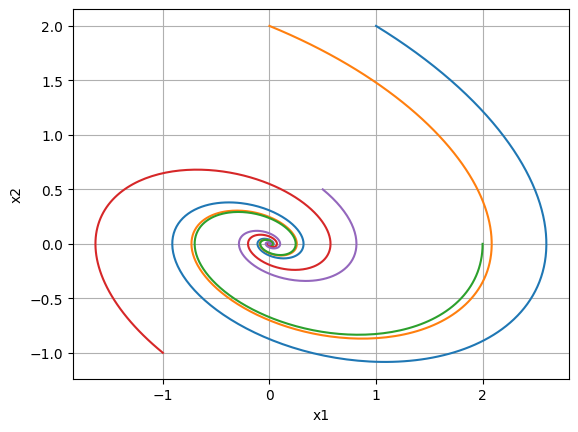

In [2070]:
data = plot_dynamic_system(A4, [[[] for _ in range(2)] for _ in range(len(initial_conditions))])

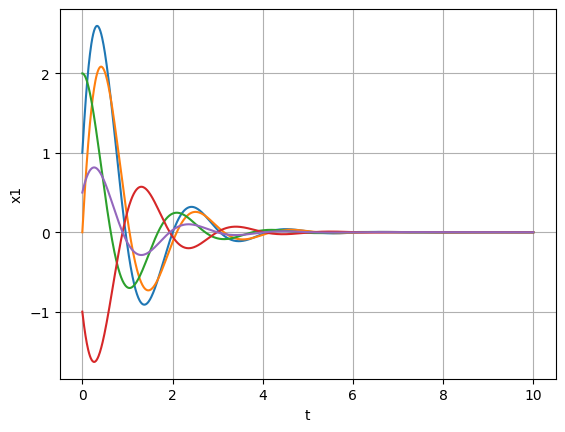

In [2071]:
plot_movement_in_time(t_vals, data, 0)

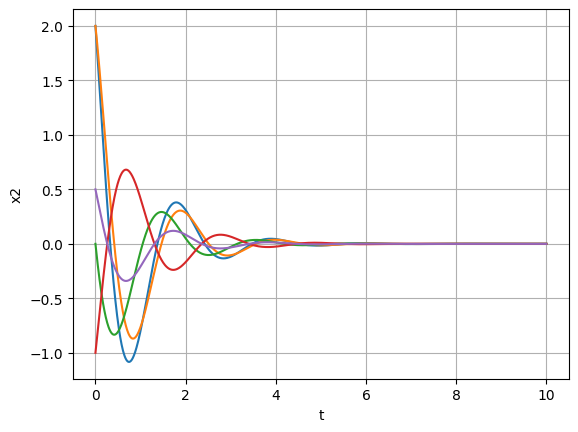

In [2072]:
plot_movement_in_time(t_vals, data, 1)

### 5. Система неустойчива

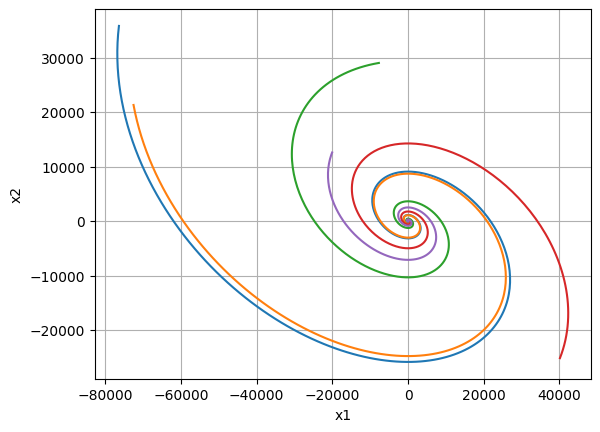

In [2073]:
data = plot_dynamic_system(A5, [[[] for _ in range(2)] for _ in range(len(initial_conditions))])

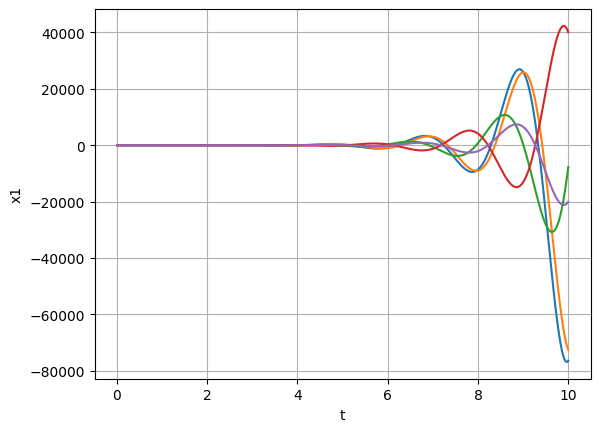

In [2074]:
plot_movement_in_time(t_vals, data, 0)

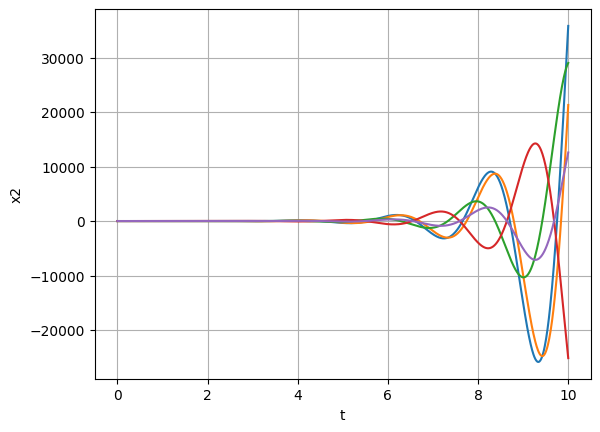

In [2075]:
plot_movement_in_time(t_vals, data, 1)

### 6. Система устойчива(но не асимптотически)

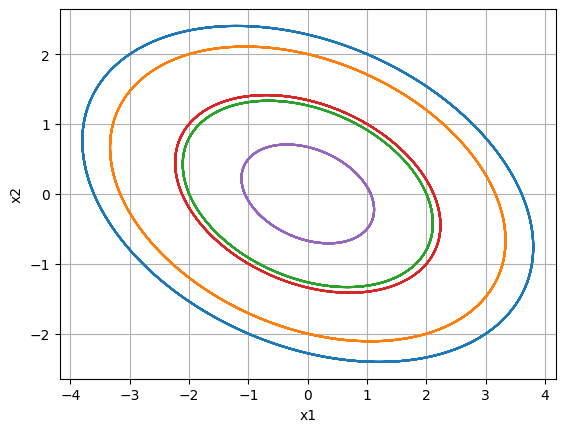

In [2076]:
data = plot_dynamic_system(A6, [[[] for _ in range(2)] for _ in range(len(initial_conditions))])

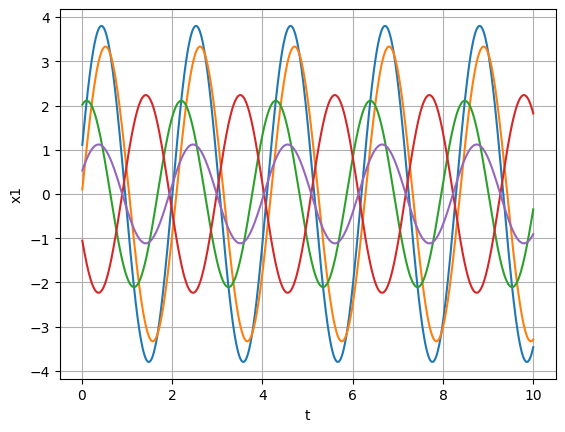

In [2077]:
plot_movement_in_time(t_vals, data, 0)

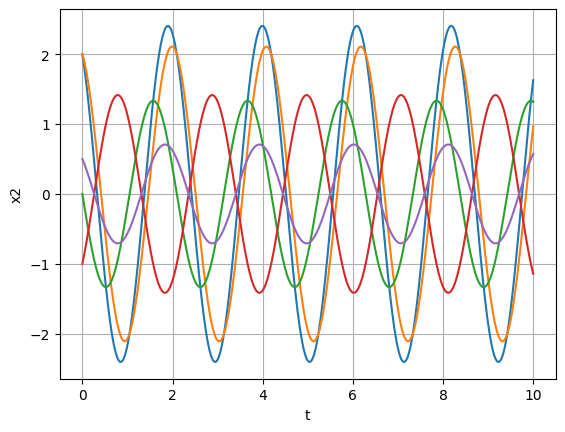

In [2078]:
plot_movement_in_time(t_vals, data, 1)

# Задание 2. Дискретные системы

**Непрерывная линейная динамическая система второго порядка:**
$$
\begin{cases}
    x_1(k + 1) = a_1 x_1(k) + a_2 x_2(k), \\
    x_2(k + 1) = a_3 x_1(k) + a_4 x_2(k),
\end{cases}
$$
**Или в более компактной форме:**
$$
x(k + 1) = A x(k),
\text{где } x \in \mathbb{R}^2, \, A \in \mathbb{R}^{2 \times 2}.
$$

### Пункт 1. Дискретная динамическая система с собственными числами: $\lambda_{1,2}=-1$

**Необходимо выбрать матрицу из вариантов:**
$$\(\begin{bmatrix} -1 & 0 \\ 0 & -1 \end{bmatrix}\) или \(\begin{bmatrix} -1 & 1 \\ 0 & -1 \end{bmatrix}\)$$
**Первую использовать нельзя, так как она диагональна и при умножении на базис собственных векторов возвращает себя. Однако для нас важно, чтобы предложенные матрицы не были диагональными, поэтому выбираем вторую. Базис собственных векторов выбираем следующим образом:**
$$
\[
A = PJP^{-1} = 
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
\begin{bmatrix} -1 & 1 \\ 0 & -1 \end{bmatrix}
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1}
\]
$$

In [2079]:
A1 = Matrix([[1, - 1], [9, - 5]]) / 2
A1

Matrix([
[1/2, -1/2],
[9/2, -5/2]])

In [2080]:
print_data(A1.eigenvects())

Собственный вектор при собственном значении -1


Matrix([
[1/3],
[  1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix} \)$**

### Пункт 2. Дискретная динамическая система с собственными числами: $\lambda_{1,2}=-\frac{1}{\sqrt{2}} \pm \frac{i}{\sqrt{2}}$

**Если в рассматриваемой задаче присутствуют комплексные числа, то для получения матрицы в поле вещественных чисел достаточно выбрать такие собственные векторы, которые отличаются только комплексно сопряженными числами. Пример:**
$$
\[
A = PDP^{-1} = 
\begin{bmatrix} 1 + i & 1 - i \\ 1 & 1 \end{bmatrix} 
\begin{bmatrix} -\frac{1}{\sqrt{2}} + \frac{i}{\sqrt{2}} & 0 \\ 0 & -\frac{1}{\sqrt{2}} - \frac{i}{\sqrt{2}} \end{bmatrix} 
\begin{bmatrix} 1 + i & 1 - i \\ 1 & 1 \end{bmatrix}^{-1}
\]
$$

In [2081]:
A2 = Matrix([[0, -sqrt(2)], [sqrt(2) / 2, -sqrt(2)]])
A2

Matrix([
[        0, -sqrt(2)],
[sqrt(2)/2, -sqrt(2)]])

In [2082]:
print_data(A2.eigenvects())

Собственный вектор при собственном значении -sqrt(2)/2 - sqrt(2)*I/2


Matrix([
[2 + sqrt(2)*(-sqrt(2)/2 - sqrt(2)*I/2)],
[                                     1]])

Собственный вектор при собственном значении -sqrt(2)/2 + sqrt(2)*I/2


Matrix([
[2 + sqrt(2)*(-sqrt(2)/2 + sqrt(2)*I/2)],
[                                     1]])

### Пункт 3. Дискретная динамическая система с собственными числами: $\lambda_{1,2}=\pm i$

**Проведем аналогичную операцию с собственными векторами, однако, для разнообразия, выберем другие варианты для разложения:**
$$
\[
A = PDP^{-1} = \begin{bmatrix} i & -i \\ 1 & 1 \end{bmatrix} \begin{bmatrix} i & 0 \\ 0 & -i \end{bmatrix} \begin{bmatrix} i & -i \\ 1 & 1 \end{bmatrix}^{-1}
\]
$$
**Заметим, что данная матрица не является диагональной, так как по определению диагональной матрицы все ненулевые элементы располагаются исключительно на главной диагонали.**


In [2083]:
A3 = Matrix([[0, -1], [1, 0]])
A3

Matrix([
[0, -1],
[1,  0]])

In [2084]:
print_data(A3.eigenvects())

Собственный вектор при собственном значении -I


Matrix([
[-I],
[ 1]])

Собственный вектор при собственном значении I


Matrix([
[I],
[1]])

### Пункт 4. Дискретная динамическая система с собственными числами: $\lambda_{1,2}=\frac{1}{\sqrt{2}} \pm \frac{i}{\sqrt{2}}$

**Не будем усложнять процесс и просто подставим те же самые собственные векторы, что и в пункте №2:**
$$
\[
A = PDP^{-1} = \begin{bmatrix} 1 + i & 1 - i \\ 1 & 1 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} + \frac{1}{\sqrt{2}i} & 0 \\ 0 & \frac{1}{\sqrt{2}} - \frac{1}{\sqrt{2}i} \end{bmatrix} \begin{bmatrix} 1 + i & 1 - i \\ 1 & 1 \end{bmatrix}^{-1}
\]
$$

In [2085]:
A4 = Matrix([[sqrt(2), -sqrt(2)], [sqrt(2) / 2, 0]])
A4

Matrix([
[  sqrt(2), -sqrt(2)],
[sqrt(2)/2,        0]])

In [2086]:
print_data(A4.eigenvects())

Собственный вектор при собственном значении sqrt(2)/2 - sqrt(2)*I/2


Matrix([
[sqrt(2)*(sqrt(2)/2 - sqrt(2)*I/2)],
[                                1]])

Собственный вектор при собственном значении sqrt(2)/2 + sqrt(2)*I/2


Matrix([
[sqrt(2)*(sqrt(2)/2 + sqrt(2)*I/2)],
[                                1]])

### Пункт 5. Дискретная динамическая система с собственными числами: $\lambda_{1,2}=1$

**В данной ситуации, аналогичной той, что рассматривалась в пункте №1, требуется выбрать не диагональную матрицу собственных чисел, а жорданову форму:**
$$
\[
A = PJP^{-1} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1}
\]
$$

In [2087]:
A5 = Matrix([[5, -1], [9, -1]]) / 2
A5

Matrix([
[5/2, -1/2],
[9/2, -1/2]])

In [2088]:
print_data(A5.eigenvects())

Собственный вектор при собственном значении 1


Matrix([
[1/3],
[  1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix} \)$**

### Пункт 6. Те же собственные числа, что и в пункте 1, только умноженные на константу $c$ такую, что $0 < c < 1$.

**Теперь перед нами собственные значения $\lambda_{1,2} = -0.5$, однако методика получения матрицы $A$ остается неизменной:**
$$
\[
A = PJP^{-1} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} 
\begin{bmatrix} -0.5 & 1 \\ 0 & -0.5 \end{bmatrix} 
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1}
\]
$$

In [2089]:
A6 = Matrix([[1, 0], [0, -2]]) + Matrix([[0, -1], [9, 0]]) / 2
A6

Matrix([
[  1, -1/2],
[9/2,   -2]])

In [2090]:
print_data(A6.eigenvects())

Собственный вектор при собственном значении -1/2


Matrix([
[1/3],
[  1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix} \)$**

### Пункт 7. Те же собственные числа, что и в пункте 3, только умноженные на константу $c$ такую, что $0 < c < 1$.

**В данном случае собственные значения $\lambda_{1,2} = \pm 0.5i$:**
$$
\[
A = PDP^{-1} = \begin{bmatrix} i & -i \\ 1 & 1 \end{bmatrix} 
\begin{bmatrix} 0.5i & 0 \\ 0 & -0.5i \end{bmatrix} 
\begin{bmatrix} i & -i \\ 1 & 1 \end{bmatrix}^{-1}
\]
$$

In [2091]:
A7 = Matrix([[0, -1], [1, 0]]) / 2
A7

Matrix([
[  0, -1/2],
[1/2,    0]])

In [2092]:
print_data(A7.eigenvects())

Собственный вектор при собственном значении -I/2


Matrix([
[-I],
[ 1]])

Собственный вектор при собственном значении I/2


Matrix([
[I],
[1]])

### Пункт 8. Те же собственные числа, что и в пункте 5, только умноженные на константу $c$ такую, что $0 < c < 1$.

**В диагональной форме работаем с собственными значениями $\lambda_{1,2} = 0.5$:**
$$
\[
A = PJP^{-1} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} 
\begin{bmatrix} 0.5 & 1 \\ 0 & 0.5 \end{bmatrix} 
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1}
\]
$$

In [2093]:
A8 = Matrix([[2, 0], [0, -1]]) + Matrix([[0, -1], [9, 0]]) / 2
A8

Matrix([
[  2, -1/2],
[9/2,   -1]])

In [2094]:
print_data(A8.eigenvects())

Собственный вектор при собственном значении 1/2


Matrix([
[1/3],
[  1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix} \)$**

### Пункт 9. Те же собственные числа, что и в пункте 1 только умноженные на константу $d$ такую, что $d > 1$.

**Теперь у нас есть собственные числа $\(\lambda_{1,2} = -3\)$, и метод получения матрицы $\(A\)$ остаётся тем же:**
$$
\[
A = PJP^{-1} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} 
\begin{bmatrix} -3 & 1 \\ 0 & -3 \end{bmatrix} 
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1}
\]
$$

In [2095]:
A9 = Matrix([[-3, -1], [9, -9]]) / 2
A9

Matrix([
[-3/2, -1/2],
[ 9/2, -9/2]])

In [2096]:
print_data(A9.eigenvects())

Собственный вектор при собственном значении -3


Matrix([
[1/3],
[  1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix} \)$**

### Пункт 10. Те же собственные числа, что и в пункте 3 только умноженные на константу $d$ такую, что $d > 1$.

**В данном случае собственные числа равны $\(\lambda_{1,2} = \pm 3i\)$:**
$$
\[
A = PDP^{-1} = \begin{bmatrix} i & -i \\ 1 & 1 \end{bmatrix} 
\begin{bmatrix} 3i & 0 \\ 0 & -3i \end{bmatrix} 
\begin{bmatrix} i & -i \\ 1 & 1 \end{bmatrix}^{-1}
\]
$$

In [2097]:
A10 = Matrix([[0, -3], [3, 0]])
A10

Matrix([
[0, -3],
[3,  0]])

In [2098]:
print_data(A10.eigenvects())

Собственный вектор при собственном значении -3*I


Matrix([
[-I],
[ 1]])

Собственный вектор при собственном значении 3*I


Matrix([
[I],
[1]])

### Пункт 11. Те же собственные числа, что и в пункте 5 только умноженные на константу $d$ такую, что $d > 1$.

**В случае диагональной матрицы рассматриваем собственные числа $\(\lambda_{1,2} = 3\)$:**
$$
\[
A = PJP^{-1} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} 
\begin{bmatrix} 3 & 1 \\ 0 & 3 \end{bmatrix} 
\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1}
\]
$$

In [2099]:
A11 = Matrix([[9, -1], [9, 3]]) / 2
A11

Matrix([
[9/2, -1/2],
[9/2,  3/2]])

In [2100]:
print_data(A11.eigenvects())

Собственный вектор при собственном значении 3


Matrix([
[1/3],
[  1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix} \)$**

### Пункт 12. Дискретная динамическая система с собственными числами: $\lambda_{1,2}=0$

**Нам предлагают решение, которое может привести к затруднениям, аналогичным рассмотренным в пунктах №1,5,6,8,9,11. Использование диагональной матрицы вида $\(\begin{bmatrix} 0 & 0 \\ 0 & 0 \end{bmatrix}\)$ привело бы к обнулению всех элементов, что сделало бы дальнейшие расчеты невозможными. В связи с этим необходимо применить жорданову форму, возникающую в условиях недостатка собственных векторов для матрицы $\(\begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix}\)$, так как она содержит хотя бы одну единичную компоненту:**
$$
\[
A = PJP^{-1} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \begin{bmatrix} 0 & 1 \\ 0 & 0 \end{bmatrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}^{-1}
\]
$$

In [2101]:
A12 = Matrix([[3, -1], [9, -3]]) / 2
A12

Matrix([
[3/2, -1/2],
[9/2, -3/2]])

In [2102]:
print_data(A12.eigenvects())

Собственный вектор при собственном значении 0


Matrix([
[1/3],
[  1]])

**Присоединенный к $v_1$ вектор $\( \begin{bmatrix} \frac{1}{2} \\ 1 \end{bmatrix} \)$**

### Cобственные числа на комплексной плоскости

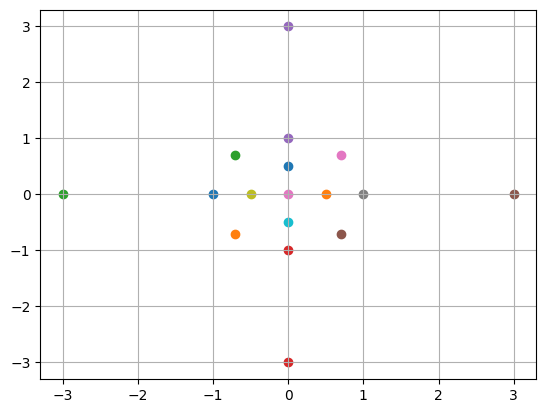

In [2103]:
plt.scatter(-1, 0)                      # 1
plt.scatter(-1/sqrt(2), -1/sqrt(2))     # 2
plt.scatter(-1/sqrt(2), 1/sqrt(2))      # 2
plt.scatter(0, -1)                      # 3
plt.scatter(0, 1)                       # 3
plt.scatter(1/sqrt(2), -1/sqrt(2))      # 4
plt.scatter(1/sqrt(2), 1/sqrt(2))       # 4
plt.scatter(1, 0)                       # 5
plt.scatter(-0.5, 0)                    # 6
plt.scatter(0, -0.5)                    # 7
plt.scatter(0, 0.5)                     # 7
plt.scatter(0.5, 0)                     # 8
plt.scatter(-3, 0)                      # 9
plt.scatter(0, -3)                      # 10
plt.scatter(0, 3)                       # 10
plt.scatter(3, 0)                       # 11
plt.scatter(0, 0)                       # 12
plt.grid(True)

**Получается, что на комплексной плоскости располагаются три группы собственных чисел, образующих три окружности разных радиусов.**

# Моделирование дискретного

### Начальные условия

In [2189]:
x0 = Matrix([4, 2])
k_vals = np.arange(25)

In [2190]:
def plot_discrete_system(A_matrix, discrete_system_data):
    for k in k_vals:
        x_vector = A_matrix ** k * x0
        for j in range(len(discrete_system_data)):
            discrete_system_data[j].append(x_vector[j])
    
    for i in range(len(discrete_system_data)):
        plt.plot(k_vals, discrete_system_data[i], label=f'x{i + 1}(t)')

    plt.legend()
    plt.grid(True)

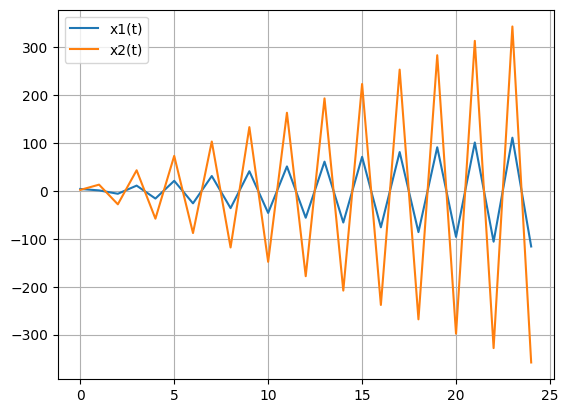

In [2191]:
plot_discrete_system(A1, [[] for _ in range(2)])

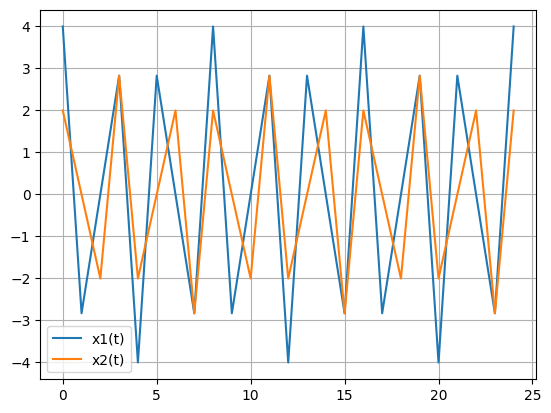

In [2192]:
plot_discrete_system(A2, [[] for _ in range(2)])

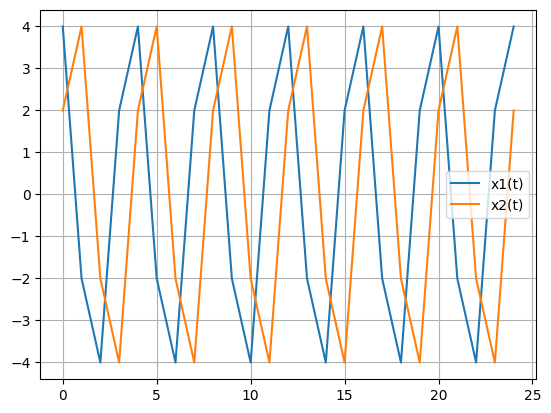

In [2193]:
plot_discrete_system(A3, [[] for _ in range(2)])

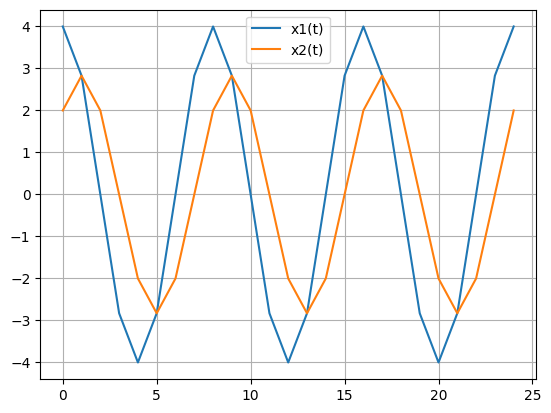

In [2194]:
plot_discrete_system(A4, [[] for _ in range(2)])

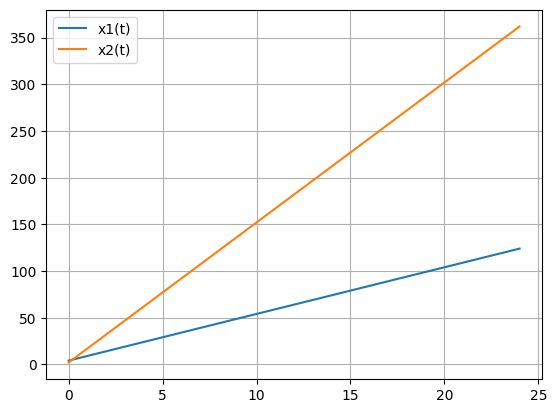

In [2195]:
plot_discrete_system(A5, [[] for _ in range(2)])

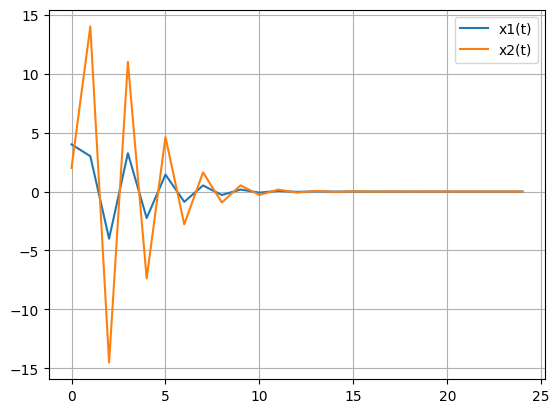

In [2196]:
plot_discrete_system(A6, [[] for _ in range(2)])

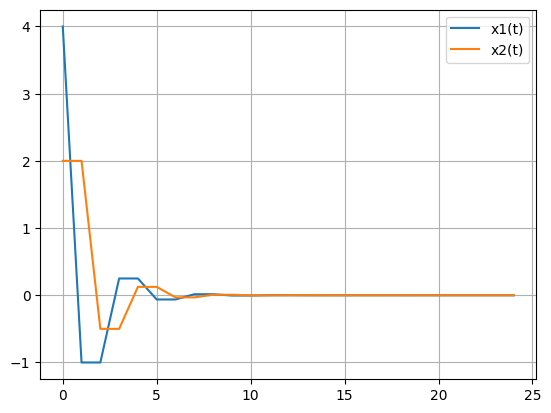

In [2197]:
plot_discrete_system(A7, [[] for _ in range(2)])

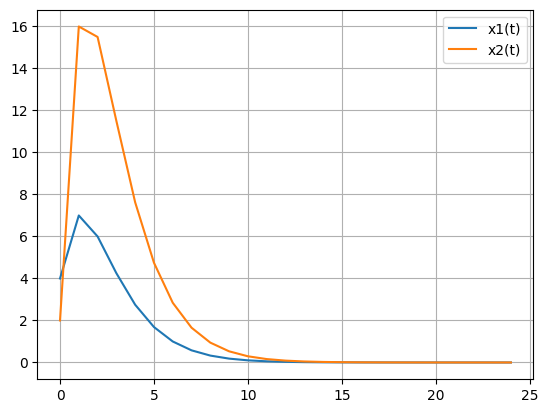

In [2198]:
plot_discrete_system(A8, [[] for _ in range(2)])

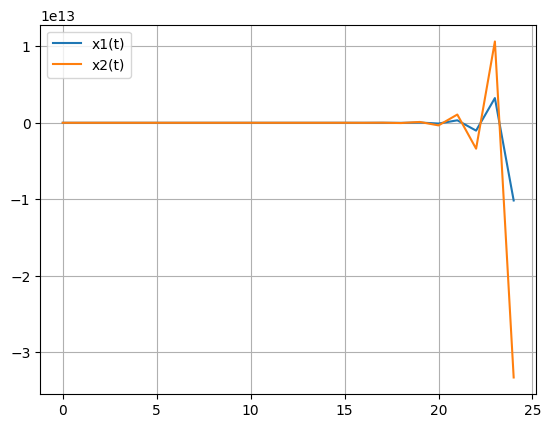

In [2199]:
plot_discrete_system(A9, [[] for _ in range(2)])

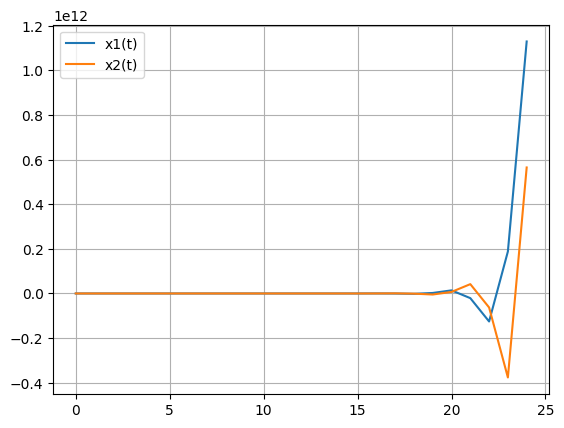

In [2200]:
plot_discrete_system(A10, [[] for _ in range(2)])

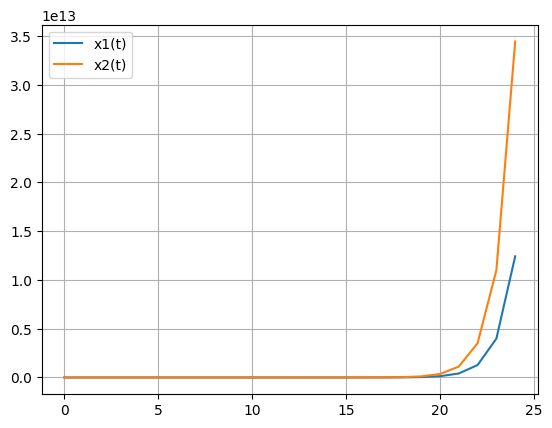

In [2201]:
plot_discrete_system(A11, [[] for _ in range(2)])

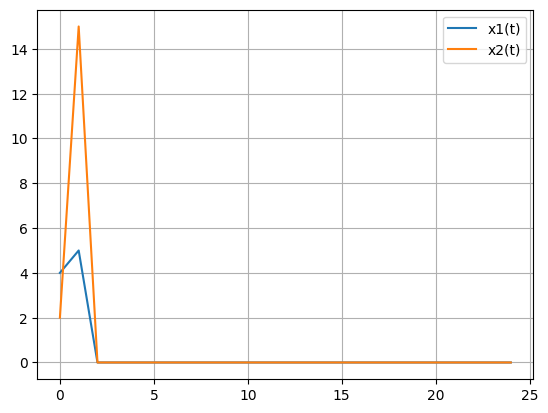

In [2202]:
plot_discrete_system(A12, [[] for _ in range(2)])

### Вывод:

* **Основное условие асимптотической устойчивости дискретной системы заключается в выполнении неравенства $\(|\lambda| < 1\)$ для собственных чисел матрицы. В противном случае, как показано в пунктах №1,5, система неустойчива при $\(\lambda = \pm 1\)$ из-за отсутствия полного базиса собственных векторов.**

* **Для комплексных собственных чисел $\(\lambda = a \pm bi\)$ система будет асимптотически устойчива, если $\(\sqrt{a^2 + b^2} < 1\)$. В случае $\(\sqrt{a^2 + b^2} = 1\)$, система остаётся устойчивой, но не асимптотически.**

* **Интересен случай с жордановой формой: при возведении в степень, система стремится к нулю на следующем шаге.**

# Задание 3. Осциллятор?

In [2225]:
t_vals = np.linspace(0, 10, 100)
t_vals_1 = np.linspace(0, 1, 100)

In [2226]:
def plot_oscillator(t_line, x_vector, oscillator_data):
    for t_value in t_line:
        for j in range(len(oscillator_data)):
            oscillator_data[j].append(x_vector[j].subs(t, t_value))
    
    plt.plot(*[array for array in oscillator_data])
    plt.grid(True)

### 1.  a < 0, b = 0

In [2227]:
a = -2
b = 0

In [2228]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[ 0, 1],
[-2, 0]])

In [2229]:
x0 = Matrix([-2, 1])
x = exp(A * t) * x0
x

Matrix([
[sqrt(2)*sin(sqrt(2)*t)/2 - 2*cos(sqrt(2)*t)],
[  2*sqrt(2)*sin(sqrt(2)*t) + cos(sqrt(2)*t)]])

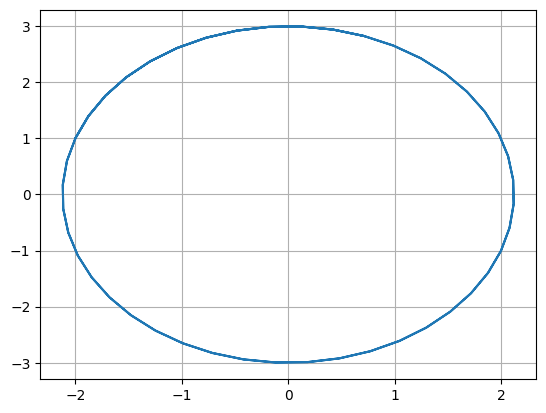

In [2230]:
plot_oscillator(t_vals, x, [[] for _ in range(2)])

### 2. a < 0, b < 0

In [2232]:
a = -2
b = -3

In [2233]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[ 0,  1],
[-2, -3]])

In [2234]:
x0 = Matrix([[-2], [1]])
x = exp(A * t) * x0
x

Matrix([
[ -3*exp(-t) + exp(-2*t)],
[3*exp(-t) - 2*exp(-2*t)]])

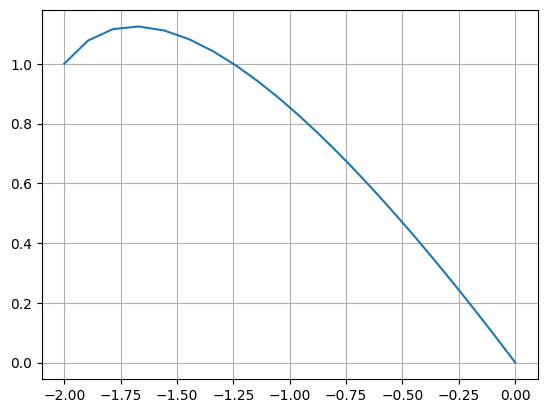

In [2235]:
plot_oscillator(t_vals, x, [[] for _ in range(2)])

### 3. a > 0, b = 0

In [2236]:
a = 4
b = 0

In [2237]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[0, 1],
[4, 0]])

In [2238]:
x0 = Matrix([[-2], [1]])
x = exp(A * t) * x0
x

Matrix([
[-3*exp(2*t)/4 - 5*exp(-2*t)/4],
[-3*exp(2*t)/2 + 5*exp(-2*t)/2]])

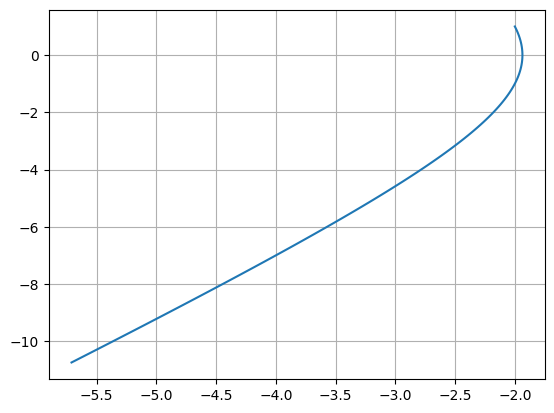

In [2240]:
plot_oscillator(t_vals_1, x, [[] for _ in range(2)])

### 4.a > 0, b < 0

In [2241]:
a = 4
b = -1

In [2242]:
A = Matrix([[0, 1], [a, b]])
A

Matrix([
[0,  1],
[4, -1]])

In [2243]:
x0 = Matrix([[-2], [1]])
x = exp(A * t) * x0
x

Matrix([
[-2*(4*sqrt(17) + 68)*exp(t*(-1/2 + sqrt(17)/2))/((-1/2 + sqrt(17)/2)*(17 + 17*sqrt(17))) + (1/2 - sqrt(17)/34)*exp(t*(-1/2 + sqrt(17)/2))/(-1/2 + sqrt(17)/2) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/(17*(-sqrt(17)/2 - 1/2)) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/((-17 + 17*sqrt(17))*(-sqrt(17)/2 - 1/2))],
[                                                                                      -2*(4*sqrt(17) + 68)*exp(t*(-1/2 + sqrt(17)/2))/(17 + 17*sqrt(17)) + (1/2 - sqrt(17)/34)*exp(t*(-1/2 + sqrt(17)/2)) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/(-17 + 17*sqrt(17)) + 8*sqrt(17)*exp(t*(-sqrt(17)/2 - 1/2))/17]])

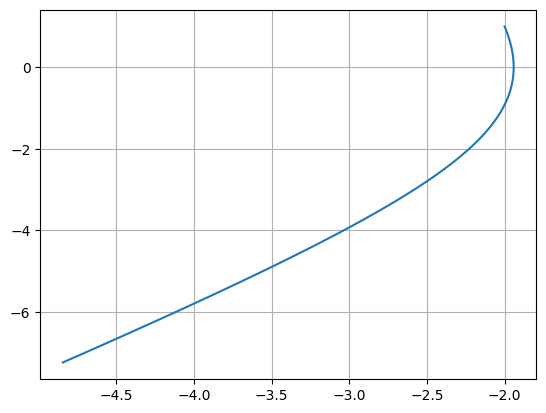

In [2244]:
plot_oscillator(t_vals_1, x, [[] for _ in range(2)])